In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
import ast

In [2]:
def hamming_distance(str1, str2):
    if len(str1) != len(str2):
        raise ValueError("Strings must be of the same length")
    return sum(c1 != c2 for c1, c2 in zip(str1, str2))

def predict(string_1, string_2, tau):
    return 1 if hamming_distance(string_1, string_2) < tau else -1

In [3]:
# create clusters
def cluster_dataset(string_df, tau):
    n = len(string_df)
    clusters = np.full(n, -1)  # -1 indicates that the item hasn't been clustered yet
    next_cluster_id = 0
    
    for i in range(n):
        if clusters[i] == -1:  # If not yet clustered
            clusters[i] = next_cluster_id
            for j in range(i + 1, n):
                if predict(string_df['fingerprint'][i], string_df['fingerprint'][j], tau) == 1:
                    clusters[j] = next_cluster_id
            next_cluster_id += 1
    
    return clusters

In [5]:
m = 18
n_bits = 16
test_df = pd.read_csv("C:/Users/fabio/Documents/GitHub/CompactProbes/data/train_test/bin_test_new.csv")
indexes = pd.read_csv(f"C:/Users/fabio/Documents/GitHub/CompactProbes/outputs/PF/indexes/indexes_{m}.csv")
indexes = indexes['Index'].tolist()

In [6]:

def extract_chars(string, indexes):
    return ''.join(string[i] for i in indexes[:n_bits])

# Example usage
test_df['fingerprint'] = test_df['concatenated'].apply(lambda x: extract_chars(x, indexes))

In [7]:
for tau in range(0,n_bits+1):
    clusters = cluster_dataset(test_df, tau)
    test_df["cluster_tau_"+str(tau)] = clusters
    
    

In [8]:
for tau in range(0,n_bits+1):
    print("TAU = ", tau)
    # Ground truth labels
    true_labels = test_df['label'].to_numpy()
    clusters = test_df[f'cluster_tau_{tau}']

    # Calculate metrics
    homogeneity = homogeneity_score(true_labels, clusters)
    completeness = completeness_score(true_labels, clusters)
    v_measure = v_measure_score(true_labels, clusters)

    print(f"Homogeneity: {homogeneity}")
    print(f"Completeness: {completeness}")
    print(f"V-Measure: {v_measure}")
    print('RMSE:', np.sqrt(np.mean((test_df['label'].nunique() - test_df[f'cluster_tau_{tau}'].nunique())**2)))

TAU =  0
Homogeneity: 0.9999999999999998
Completeness: 0.350799402359847
V-Measure: 0.519395258462508
RMSE: 563.0
TAU =  1
Homogeneity: 0.797614144835899
Completeness: 0.7909134455303992
V-Measure: 0.7942496627968264
RMSE: 2.0
TAU =  2
Homogeneity: 0.7514849665077691
Completeness: 0.8061734575173933
V-Measure: 0.7778691712864567
RMSE: 4.0
TAU =  3
Homogeneity: 0.6898203460443979
Completeness: 0.8591178323206214
V-Measure: 0.7652170611610615
RMSE: 7.0
TAU =  4
Homogeneity: 0.6619363720987042
Completeness: 0.9693207315342213
V-Measure: 0.7866677141241216
RMSE: 8.0
TAU =  5
Homogeneity: 0.5994658412684458
Completeness: 0.8567519930926271
V-Measure: 0.7053801185219417
RMSE: 9.0
TAU =  6
Homogeneity: 0.6635474627740016
Completeness: 0.9377815548441941
V-Measure: 0.777182658288016
RMSE: 9.0
TAU =  7
Homogeneity: 0.6478484463358741
Completeness: 0.9468132496627929
V-Measure: 0.7693061096323884
RMSE: 9.0
TAU =  8
Homogeneity: 0.46116889652554105
Completeness: 0.9891225247026635
V-Measure: 0.62

## SUBSETS

In [9]:
combination_df = pd.read_csv("C:/Users/fabio/Documents/GitHub/CompactProbes/data/train_test/10_combinations_test.csv",index_col=0)

In [10]:
test_df

,label,concatenated,fingerprint,cluster_tau_0,cluster_tau_1,cluster_tau_2,cluster_tau_3,cluster_tau_4,cluster_tau_5,cluster_tau_6,cluster_tau_7,cluster_tau_8,cluster_tau_9,cluster_tau_10,cluster_tau_11,cluster_tau_12,cluster_tau_13,cluster_tau_14,cluster_tau_15,cluster_tau_16
0,GooglePixel3A_L,UUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU...,U111110UUUUUUUUU,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,GooglePixel3A_L,UUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU...,U111110UUUUUUUUU,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,GooglePixel3A_L,UUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU...,U111110UUUUUUUUU,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,GooglePixel3A_L,UUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU...,U111110UUUUUUUUU,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,GooglePixel3A_L,UUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU...,U111110UUUUUUUUU,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,iPhoneXR_U,0001101000101101010000000001011111111111000000...,0UUUUUUUUUUUUUUU,573,6,5,4,3,3,3,3,0,0,0,0,0,0,0,0,0
574,iPhoneXR_U,0001101000101101000000000001011111111111000000...,0UUUUUUUUUUUUUUU,574,6,5,4,3,3,3,3,0,0,0,0,0,0,0,0,0
575,iPhoneXR_U,0001101000101101000000000001011111111111000000...,0UUUUUUUUUUUUUUU,575,6,5,4,3,3,3,3,0,0,0,0,0,0,0,0,0
576,iPhoneXR_U,0001101000101101010000000001011111111111000000...,0UUUUUUUUUUUUUUU,576,6,5,4,3,3,3,3,0,0,0,0,0,0,0,0,0


In [11]:
results = []
def str_to_list(s):
    try:
        return ast.literal_eval(s)
    except (ValueError, SyntaxError):
        return s 

best_tau = 2
for index, row in combination_df.iterrows():
    combination = str_to_list(index)
    print(combination)
    length = row['length']
    
    subset_df = test_df[test_df['label'].isin(combination)].reset_index(drop=True)
    print(subset_df.shape)
    true_labels = subset_df['label'].to_numpy()
    clusters = cluster_dataset(subset_df, best_tau)

    subset_df.loc[:, 'cluster'] = clusters

    homogeneity = homogeneity_score(true_labels, clusters)
    completeness = completeness_score(true_labels, clusters)
    v_measure = v_measure_score(true_labels, clusters)
    rmse = np.sqrt(np.mean((subset_df['label'].nunique() - subset_df['cluster'].nunique())**2))

    results.append([length, homogeneity, completeness, v_measure, rmse])
    print([length, homogeneity, completeness, v_measure, rmse])

('XiaomiRedmi5_J', 'GooglePixel3A_V')
(122, 20)
[np.int64(2), np.float64(0.4247248608213761), np.float64(0.15389428197430696), np.float64(0.22592659889174613), np.float64(2.0)]
('GooglePixel3A_L', 'iPhone11_F', 'S21Ultra_M')
(55, 20)
[np.int64(3), np.float64(0.9385637421014024), np.float64(0.4855088390485014), np.float64(0.6399687752329557), np.float64(1.0)]
('OppoFindX3Neo_A', 'iPhoneXR_U', 'HuaweiP20_G', 'iPhone11_F')
(102, 20)
[np.int64(4), np.float64(0.9300939389965925), np.float64(0.9602044459856306), np.float64(0.9449093778040919), np.float64(0.0)]
('GooglePixel3A_V', 'XiaomiRedmi5_J', 'iPhone11_F', 'SamsungS6_H', 'iPhoneXR_U')
(164, 20)
[np.int64(5), np.float64(0.8009677593032677), np.float64(0.5469505871296777), np.float64(0.6500242205059388), np.float64(1.0)]
('XiaomiRedmi4_B', 'SamsungM31_A', 'GooglePixel3A_L', 'iPhone12Pro_C', 'GooglePixel3A_V', 'OppoFindX3Neo_A')
(171, 20)
[np.int64(6), np.float64(0.4378163345234505), np.float64(0.48251286407833427), np.float64(0.4590792378

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_clustering_metrics(results, filename):
    """
    Plots clustering metrics (Homogeneity, Completeness, V-Measure, RMSE) against the length.

    Parameters:
    results (list): A list of lists, where each inner list contains length and the four metrics.

    """
    if not results:
        print("No results to plot.")
        return

    # Convert the results list to a DataFrame
    df = pd.DataFrame(results, columns=['length', 'homogeneity', 'completeness', 'v_measure', 'rmse'])

    # Sorting the DataFrame by 'length' for better visualization
    df = df.sort_values('length')

    sns.set(style="whitegrid")
    fig, axes = plt.subplots(4, 1, figsize=(8.3, 11.7))

    # fig.suptitle("Clustering Metrics vs. Length", fontsize=18)

    # Subplot for Homogeneity
    sns.lineplot(
        ax=axes[0],
        x='length',
        y='homogeneity',
        data=df,
        label='Homogeneity',
        marker='o',
        linewidth=2
    )
    axes[0].set_title('Homogeneity Score', fontsize=16)
    axes[0].set_xlabel('Length', fontsize=14)
    axes[0].set_ylabel('Score', fontsize=14)
    axes[0].tick_params(axis='both', which='major', labelsize=12)

    # Subplot for Completeness
    sns.lineplot(
        ax=axes[1],
        x='length',
        y='completeness',
        data=df,
        label='Completeness',
        marker='o',
        linewidth=2
    )
    axes[1].set_title('Completeness Score', fontsize=16)
    axes[1].set_xlabel('Length', fontsize=14)
    axes[1].set_ylabel('Score', fontsize=14)
    axes[1].tick_params(axis='both', which='major', labelsize=12)

    # Subplot for V-Measure
    sns.lineplot(
        ax=axes[2],
        x='length',
        y='v_measure',
        data=df,
        label='V-Measure',
        marker='o',
        linewidth=2
    )
    axes[2].set_title('V-Measure Score', fontsize=16)
    axes[2].set_xlabel('Length', fontsize=14)
    axes[2].set_ylabel('Score', fontsize=14)
    axes[2].tick_params(axis='both', which='major', labelsize=12)

    # Subplot for RMSE
    sns.lineplot(
        ax=axes[3],
        x='length',
        y='rmse',
        data=df,
        label='RMSE',
        marker='o',
        linewidth=2
    )
    axes[3].set_title('RMSE', fontsize=16)
    axes[3].set_xlabel('Length', fontsize=14)
    axes[3].set_ylabel('RMSE', fontsize=14)
    axes[3].tick_params(axis='both', which='major', labelsize=12)

    # Adjust spacing between subplots
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Save the plot as a PDF file
    # plt.savefig(filename, format='pdf')

    plt.show()


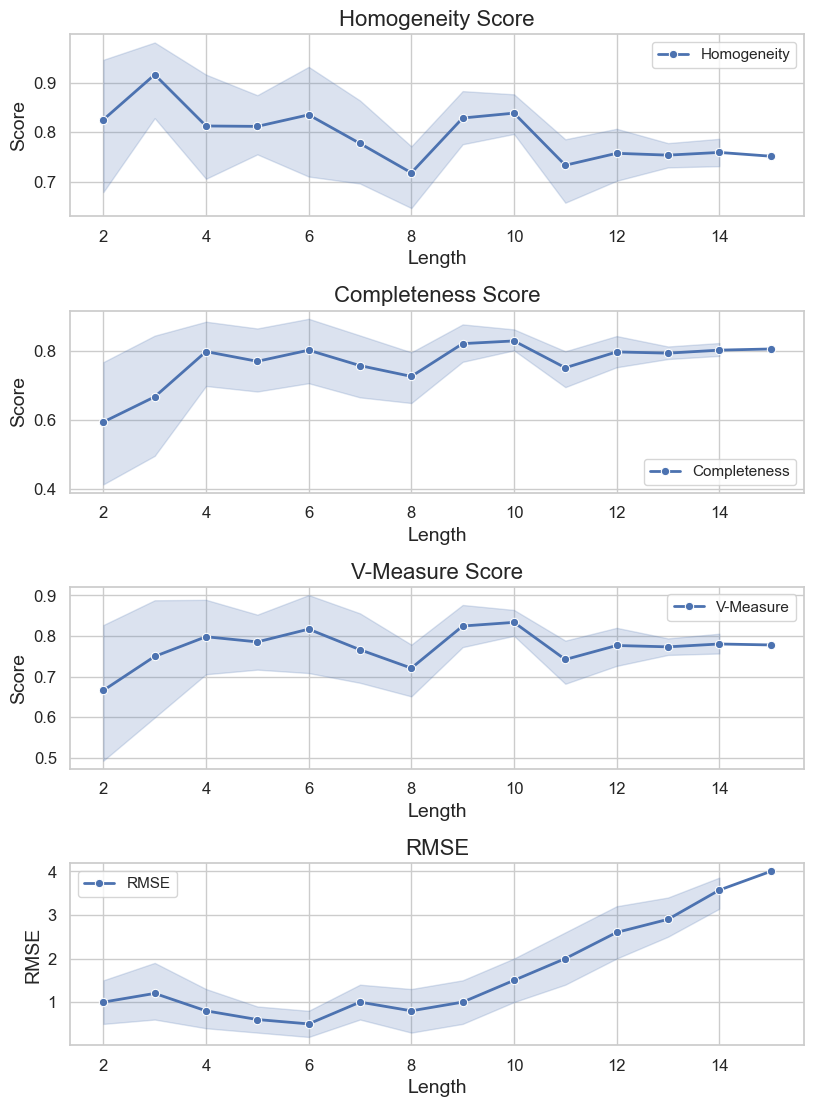

In [13]:
plot_clustering_metrics(results, f'C:/Users/fabio/Documents/GitHub/CompactProbes/outputs/figures/tau_clustering_metrics_PF_{n_bits}.pdf')